In [103]:
# link for dataset blackfriday sale ------> https://www.kaggle.com/sdolezel/black-friday
# link for dataset spam classifier -------> https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

# Problem statement for Regression
## Regression Problem (output is continuous)

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [3]:
train_dataset=pd.read_csv("blackFriday_train.csv") # reading the training dataset

In [4]:
train_dataset.head() # displaying top 5 rows of training dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train_dataset.shape # displaying number of rows and columns in dataset

(550068, 12)

In [6]:
test_dataset=pd.read_csv("blackFriday_test.csv") # reading test dataset

In [7]:
test_dataset.head()  # displaying top 5 rows of test dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
test_dataset.shape  # Total number of rows and columns in test dataset

(233599, 11)

In [9]:
df=pd.concat([train_dataset,test_dataset]) # combining both train and test datasets

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.shape

(783667, 12)

In [12]:
df.columns  #displaying all column names

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Data Description

In [13]:
df.describe()  # shows the description of data for continuous columns

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df.dtypes # showing datatypes of each column

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [15]:
df1=df.copy()   # creating a copy

In [16]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)  # droping unnecessary columns

In [17]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Feature Engineering - Converting categorical to Continuous

In [18]:
df['Gender'].unique()  #showing the unique values in 'Gender' column

array(['F', 'M'], dtype=object)

In [19]:
df['Gender']=df['Gender'].map({'F':0,'M':1})  # Mapping female - 0 and male with -1
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [22]:
df['City_Category'].unique() #showing the unique values in 'City_Category' column

array(['A', 'C', 'B'], dtype=object)

# Dummy variable trap

In [23]:
city_category=pd.get_dummies(df['City_Category'],drop_first=True) # getting dummies to the 'city_category' column
city_category
#drop_true signifies remove first column eventhough we can get all the information

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [24]:
df=pd.concat([df,city_category],axis=1) #concatenating our dataset with new features derived from 'City_category'

In [25]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df['Age'].unique()  #showing the unique values in 'Age' column

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [27]:
age=pd.get_dummies(df['Age'],drop_first=True) #getting dummies for 'Age' column

In [28]:
age.head()

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [29]:
df=pd.concat([df,age],axis=1) #concatenating age with dataframe

In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0,0,0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0,0,0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0,0,0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,0,1,0,0,0,0,0,1


In [31]:
df.isnull().sum() #checking for null values

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
18-25                              0
26-35                              0
36-45                              0
46-50                              0
51-55                              0
55+                                0
dtype: int64

In [32]:
df['Product_Category_2'].unique() # Checking the unique values for 'Product_Category_2' column

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
df['Product_Category_2'].value_counts()  # displaying the count of all occurances

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [34]:
df['Product_Category_3'].unique()  # Checking the unique values for 'Product_Category_3' column

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [35]:
df['Product_Category_3'].value_counts()  # displaying the count of all occurances

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

# Replacing Null values

In [36]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  # replacing null values with the mode of the column

In [37]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0]) # replacing null values with the mode of the column

In [38]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,0-17,10,A,2,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,0-17,10,A,2,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0
3,0,0-17,10,A,2,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0
4,1,55+,16,C,4+,0,8,8.0,16.0,7969.0,0,1,0,0,0,0,0,1


In [39]:
df.isnull().sum() #rechecking the null values

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
18-25                              0
26-35                              0
36-45                              0
46-50                              0
51-55                              0
55+                                0
dtype: int64

In [40]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean()) # replacing null values with the mean of the column

In [41]:
df.isnull().sum() # final check for null values

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
18-25                         0
26-35                         0
36-45                         0
46-50                         0
51-55                         0
55+                           0
dtype: int64

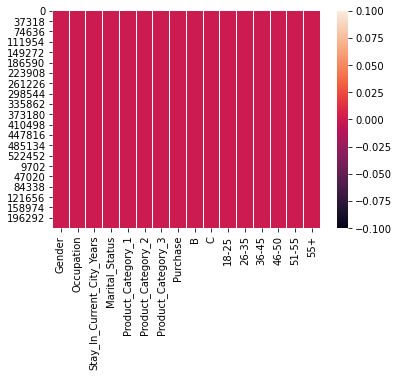

In [90]:
sns.heatmap(df.isnull())   # checking for null values by using heatmap

# We can see there are no null values and can proceed further

In [42]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,0-17,10,A,2,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,0-17,10,A,2,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0
3,0,0-17,10,A,2,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0
4,1,55+,16,C,4+,0,8,8.0,16.0,7969.0,0,1,0,0,0,0,0,1


In [43]:
df.drop('City_Category',axis=1,inplace=True) #Removing Categorical column as already it is converted
# axis=1 => entire column
# inplace=True => delete permanently

In [44]:
df.drop('Age',axis=1,inplace=True) #Removing Categorical column as already it is converted

In [45]:
df.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,10,2,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0
1,0,10,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,10,2,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0
3,0,10,2,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0
4,1,16,4+,0,8,8.0,16.0,7969.0,0,1,0,0,0,0,0,1


In [46]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') #replacing '+' with ''

In [47]:
df.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,10,2,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0
1,0,10,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,10,2,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0
3,0,10,2,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0
4,1,16,4,0,8,8.0,16.0,7969.0,0,1,0,0,0,0,0,1


In [48]:
df.dtypes #displaying datatypes of each column

Gender                          int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
18-25                           uint8
26-35                           uint8
36-45                           uint8
46-50                           uint8
51-55                           uint8
55+                             uint8
dtype: object

# Converting all datatypes to Int to feed Machine Leearning Model

In [49]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int) 

In [50]:
df.dtypes

Gender                          int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
18-25                           uint8
26-35                           uint8
36-45                           uint8
46-50                           uint8
51-55                           uint8
55+                             uint8
dtype: object

In [51]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [52]:
df.dtypes

Gender                          int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int32
C                               int32
18-25                           uint8
26-35                           uint8
36-45                           uint8
46-50                           uint8
51-55                           uint8
55+                             uint8
dtype: object

In [53]:
df['18-25']=df['18-25'].astype(int)
df['26-35']=df['26-35'].astype(int)
df['36-45']=df['36-45'].astype(int)
df['46-50']=df['46-50'].astype(int)
df['51-55']=df['51-55'].astype(int)
df['55+']=df['55+'].astype(int)

In [54]:
df.dtypes

Gender                          int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int32
C                               int32
18-25                           int32
26-35                           int32
36-45                           int32
46-50                           int32
51-55                           int32
55+                             int32
dtype: object

In [55]:
df.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,10,2,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0
1,0,10,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0,10,2,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0
3,0,10,2,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0
4,1,16,4,0,8,8.0,16.0,7969.0,0,1,0,0,0,0,0,1


# Visualizing some features

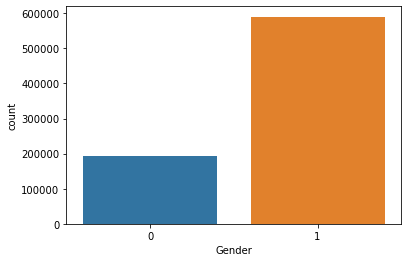

In [56]:
sns.countplot('Gender',data=df) # getting count of male and female

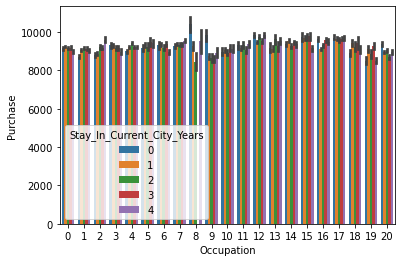

In [57]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df) #relations between Occupation and Purchase

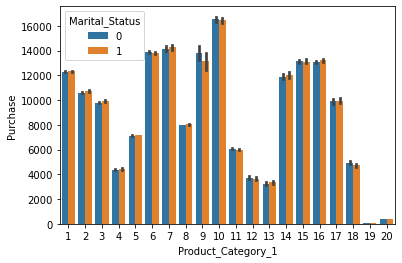

In [58]:
sns.barplot('Product_Category_1','Purchase',hue='Marital_Status',data=df)

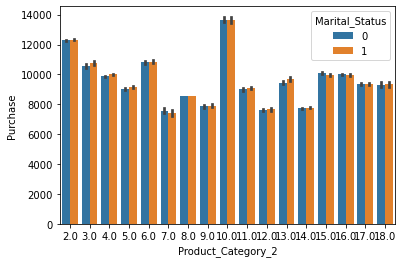

In [59]:
sns.barplot('Product_Category_2','Purchase',hue='Marital_Status',data=df)

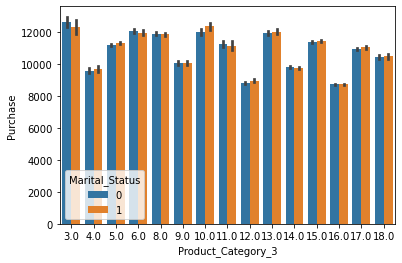

In [60]:
sns.barplot('Product_Category_3','Purchase',hue='Marital_Status',data=df)

# Splitting into Independent and dependent features
# X -Independent Features
# y-dependent feature or target feature or label column or output column

In [61]:
X=df.drop('Purchase',axis=1)  # Taking all the columns other than 'Purchase'
y=df['Purchase']   # Only purchase is the dependent feature

In [62]:
X.head() # displaying top 5 records

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,0,10,2,0,3,8.0,16.0,0,0,0,0,0,0,0,0
1,0,10,2,0,1,6.0,14.0,0,0,0,0,0,0,0,0
2,0,10,2,0,12,8.0,16.0,0,0,0,0,0,0,0,0
3,0,10,2,0,12,14.0,16.0,0,0,0,0,0,0,0,0
4,1,16,4,0,8,8.0,16.0,0,1,0,0,0,0,0,1


In [63]:
y.head()  # displaying top 5 records

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

# Performing Train_test_split on dataset

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=343)
# test-size => data given to test
# random_state => When dividing the dataset into train and test if we fit our data if me and you gives the same random state both of us will get same records during training and hence same accuracy

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(626933, 15)
(156734, 15)
(626933,)
(156734,)


#  Applying Scaling to get all the features into same scale -Standardization

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [67]:
X_train

array([[ 0.57297833, -0.62474086, -1.44220652, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833, -0.93129818, -1.44220652, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833, -0.16490488,  0.88501548, ..., -0.30193166,
         3.65226973, -0.20101223],
       ...,
       [ 0.57297833,  1.21460307, -1.44220652, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833,  0.90804575,  1.66075615, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833, -1.08457684,  0.88501548, ..., -0.30193166,
        -0.27380234, -0.20101223]])

In [68]:
X_test

array([[ 0.57297833, -0.62474086,  1.66075615, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [-1.7452667 ,  0.90804575,  0.10927481, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833,  0.60148842, -0.66646586, ..., -0.30193166,
        -0.27380234, -0.20101223],
       ...,
       [ 0.57297833, -0.62474086,  0.88501548, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [ 0.57297833, -0.62474086, -0.66646586, ..., -0.30193166,
        -0.27380234, -0.20101223],
       [-1.7452667 ,  1.67443905, -1.44220652, ..., -0.30193166,
        -0.27380234, -0.20101223]])

# Building model

## Randomforest -bagging technique(ensemble methods) 

In [69]:
from sklearn.ensemble import RandomForestRegressor # implementing bagging model -random forest

In [70]:
rfr=RandomForestRegressor() # creating an object for our model

In [71]:
rfr.fit(X_train,y_train) # fitting our training data to the model

RandomForestRegressor()

In [72]:
 rfr.score(X_train,y_train) # accuracy for training data

0.6205735079305184

In [85]:
y_pred=rfr.predict(X_test)

In [89]:
rfr.score(X_test,y_test)  #accuracy for test data

0.409712256309122

## applying gradient boost -ensemble boosting approach 

In [74]:
from sklearn import ensemble

In [75]:
reg = ensemble.GradientBoostingRegressor() # creating object for our model

In [76]:
reg.fit(X_train, y_train) # fitting the data for training

GradientBoostingRegressor()

In [77]:
reg.score(X_train, y_train) # score for training data

0.46013452244746

In [79]:
reg.score(X_test, y_test) # score for testing data

0.4613107287474708

# Applying xgboost -ensemble boosting technique

In [92]:
import xgboost as xg

In [95]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)   #creating object for model

In [96]:
xgb_r.fit(X_train,y_train) # fitting model for training

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [97]:
 xgb_r.score(X_train,y_train)  # training accuracy

0.4607946455881976

In [98]:
xgb_r.score(X_test,y_test)    # test accuracy

0.4599784392350065

# Classification Problem Statement
## Classification problem(output variable is categorical)

# Reading dataset

In [6]:
text=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])   #reading the dataset

<IPython.core.display.Javascript object>

In [7]:
text.head()  #displaying top 5 records

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
text.shape  #displaying number of rows and columns

(5572, 2)

# Why NLP ?
## The 'message' column data consists of text as text cannot be understand by a machine we need to convert text data into numbers which are known as vectors in NLP
## Some of the techniques to convert text into vectors are
### 1. Bag Of Words
### 2. TF-Idf
### 3. Word2vec

# Importing libraries for NLP

In [9]:
import nltk #Library used for NLP
import re  # for regular expression
from nltk.corpus import stopwords  # used to remove words having no meaning like is,am etc
from nltk.stem import PorterStemmer # used to convert into base words but dont care whether the word exist in the language or not
from nltk.stem import WordNetLemmatizer # used to convert into base words but cares whether the word exist in the language or not

In [10]:
stemmer=PorterStemmer() #creating object for stemming
lemmatizer=WordNetLemmatizer() #creating object for lemmatization

# Text Preprocessing

In [11]:
stemming_words=[]
for i in range(len(text)):
    data=re.sub('[^a-zA-z]',' ',text['message'][i])
    data=data.lower()
    data=data.split()
    data=[stemmer.stem(i) for i in data if i not in set(stopwords.words('english'))]
    data=' '.join(data)
    stemming_words.append(data)

## for all the sentences in the text we are removing all the punctuation marks then lowering the sentences and then we are applying stemming

In [12]:
stemming_words

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [13]:
from sklearn.feature_extraction.text import CountVectorizer  # Bag of words model to convert text into vectors

In [14]:
cv=CountVectorizer()  # Creating object

In [15]:
X=cv.fit_transform(stemming_words).toarray()  # fitting the data and converting into array

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X.shape  # Number of rows and columns
# Total there are 6302 unique words

(5572, 6302)

In [18]:
y=pd.get_dummies(text['label'],drop_first=True)  # creating dummies for the label column

<IPython.core.display.Javascript object>

In [19]:
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [20]:
y.shape  # shape of output label

(5572, 1)

# Splitting into training and testing

In [35]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
# test-size => data given to test
# random_state => When dividing the dataset into train and test if we fit our data if me and you gives the same random state both of us will get same records during training and hence same accuracy

<IPython.core.display.Javascript object>

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4457, 6302)
(4457, 1)
(1115, 6302)
(1115, 1)


# Building models

# Naive bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
naive=MultinomialNB() # Creating object for naive bayes 

In [50]:
naive.fit(X_train,y_train)   # Fitting the data for training

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

# Predicting the results of text data

In [51]:
y_pred=naive.predict(X_test)

In [52]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [53]:
y_test

,spam
4456,0
690,1
944,0
3768,0
1189,0
...,...
2906,0
1270,0
3944,0
2124,1


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve, roc_auc_score

In [57]:
score=accuracy_score(y_test,y_pred)  # score of the test data

In [58]:
score

0.979372197309417

In [78]:
con_matrix=confusion_matrix(y_test,y_pred)  # showing the confusion matrix

In [79]:
con_matrix

array([[955,   0],
       [ 90,  70]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))  # showing the entire Classification report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.91      0.95      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Our model accuracy or stability not only depend on accuracy it also depends on recall,precision and F1 score

In [80]:
true_positive = con_matrix[0][0]
false_positive = con_matrix[0][1]
false_negative = con_matrix[1][0]
true_negative = con_matrix[1][1]

In [73]:
recall=true_positive/(true_positive+false_negative)

In [74]:
recall

0.9915611814345991

In [75]:
precision=true_positive/(true_positive+false_positive)

In [76]:
precision

0.9842931937172775

In [77]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.979372197309417

In [79]:
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9879138202837625

In [82]:
auc = roc_auc_score(y_test, y_pred)  # Plotting area under the curve
auc

0.9671465968586387

# Building Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr=LogisticRegression()  # Creating object for logistic regression

In [85]:
lr.fit(X_train,y_train)  # Fitting the data for training

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [94]:
y_pred=lr.predict(X_test)   # Predicting for test data

In [95]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [96]:
score=accuracy_score(y_test,y_pred)  # Score for test data

In [97]:
score

0.9838565022421525

In [81]:
recall=true_positive/(true_positive+false_negative)
precision=true_positive/(true_positive+false_positive)
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
F1_Score = 2*(recall * precision) / (recall + precision)
auc = roc_auc_score(y_test, y_pred)

In [82]:
print(f"Recall is -------------{recall}")
print("*****************************************")
print(f"Precision is -------------{precision}")
print("*****************************************")
print(f"Accuracy is -------------{Accuracy}")
print("*****************************************")
print(f"F1 Score is -------------{F1_Score}")
print("*****************************************")
print(f"AUC is -------------{auc}")

Recall is -------------0.9138755980861244
*****************************************
Precision is -------------1.0
*****************************************
Accuracy is -------------0.9192825112107623
*****************************************
F1 Score is -------------0.955
*****************************************
AUC is -------------0.71875


# Building KNN Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier()  # Creating  object for knn

In [70]:
knn.fit(X_train,y_train)   # fitting the data

<ipython-input-70-7f4c07047eaa>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)   # fitting the data


KNeighborsClassifier()

In [85]:
y_pred=knn.predict(X_test)   # predicting for test data

In [86]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [73]:
score=accuracy_score(y_test,y_pred)   # Calculating the score for test data

In [74]:
score

0.9192825112107623

# Implementing SVM classifier

In [3]:
from sklearn import svm

In [4]:
model=svm.SVC()  # Creating object for svm

In [25]:
model.fit(X_train,y_train)  # fitting the data for training

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [26]:
y_pred=model.predict(X_test)  # predicting the test data

In [27]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [30]:
score=accuracy_score(y_test,y_pred)  # score of test data

In [31]:
score

0.9811659192825112

# Building Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree=DecisionTreeClassifier()  # creating object for decision tree

In [34]:
tree.fit(X_train,y_train)   # Fitting the model for training

DecisionTreeClassifier()

In [35]:
y_pred=tree.predict(X_test)   # testing the data

In [36]:
score=accuracy_score(y_test,y_pred)  # score for test data

In [37]:
score

0.9838565022421525

# Building Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()  # creating object for random forest

In [40]:
rfc.fit(X_train,y_train)   # fitting the data for training

<ipython-input-40-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [45]:
y_pred=rfc.predict(X_test)  # predicting for test data
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [46]:
score=accuracy_score(y_pred,y_test)   # score for test data
score

0.9811659192825112

# Implementing xgBoost classifier

In [47]:
from xgboost import XGBClassifier

In [48]:
xgb=XGBClassifier()  # creating object for xgBoost

In [49]:
xgb.fit(X_train,y_train)  # fitting the data for training

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[18:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred=xgb.predict(X_test)   # predicting the test data

In [51]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [52]:
score=accuracy_score(y_pred,y_test)   # score for test data

In [53]:
score

0.9856502242152466

# Building ADA Boost Classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
adaboost=AdaBoostClassifier()   # creatting object for adaboost

In [56]:
adaboost.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()

In [57]:
y_pred=adaboost.predict(X_test)   # predicting the test data

In [58]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [59]:
score=accuracy_score(y_pred,y_test)   # score for test data

In [60]:
score

0.9766816143497757

# Building Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
grad=GradientBoostingClassifier()   # object for gradient boost

In [63]:
grad.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [64]:
y_pred=grad.predict(X_test)  # predicting for test data

In [65]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [66]:
score=accuracy_score(y_test,y_pred)  # score for test data

In [67]:
score

0.9739910313901345